Random_state:  62
type
0    20
1    20
2    20
3    20
Name: count, dtype: int64
type
0    5
1    5
2    5
3    5
Name: count, dtype: int64
Tree>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy: 25.0 %
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.67      0.40      0.50         5
           2       0.50      0.20      0.29         5
           3       0.43      0.60      0.50         5

   micro avg       0.54      0.35      0.42        20
   macro avg       0.65      0.35      0.40        20
weighted avg       0.65      0.35      0.40        20
 samples avg       0.30      0.35      0.32        20



C:\Users\natej\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natej\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


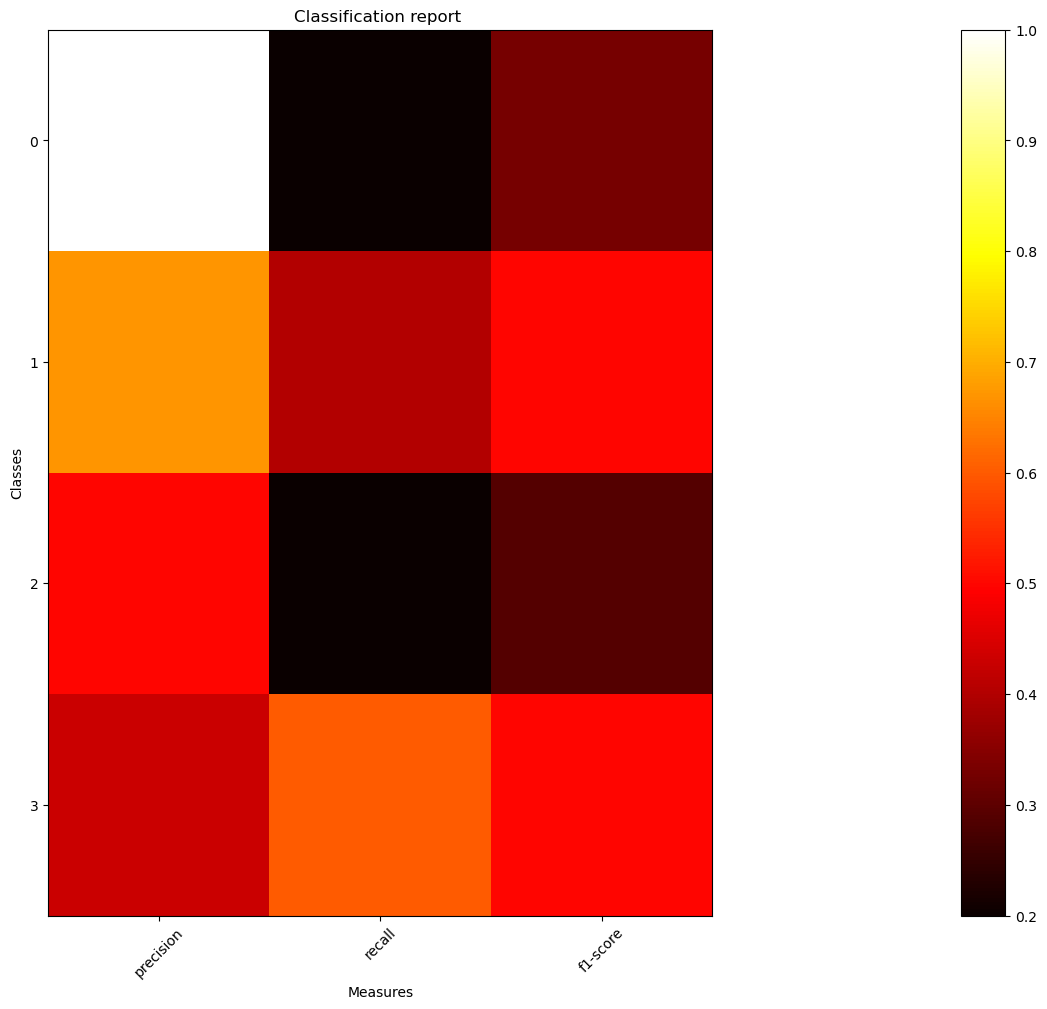

<Figure size 40000x12000 with 0 Axes>

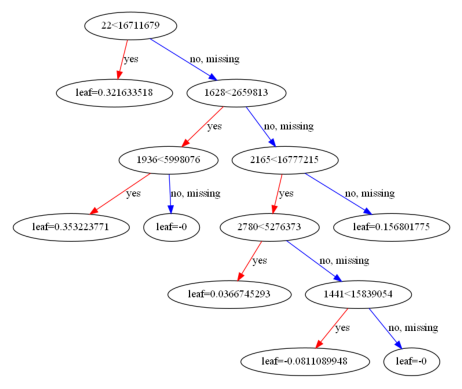

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import re
import matplotlib
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import plot_tree
import graphviz
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
import matplotlib
from sklearn import tree
from sklearn import metrics
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.datasets import make_multilabel_classification
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import re


save_the_Data=False

Treatment=pd.read_csv("../Ai code/veg1.csv")

df_x=Treatment.iloc[:,1:]
df_y=Treatment.iloc[:,0]
R_state=random.randrange(1,100)
print("Random_state: ",R_state)
R_state=81


X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=R_state,stratify=df_y)
#X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.13,stratify=df_y)


print(y_train.value_counts().sort_index())
#print(X_test)
#print(y_train.value_counts().sort_index())
#print(y_train)
#print(X_train)
print(y_test.value_counts().sort_index())

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)





print("Tree>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")








clf=XGBClassifier(tree_method="approx",
                            eta=0.05,
                  max_depth=20,
                             reg_lambda=0.7,
                            reg_alpha=0.7,
                           # subsample=0.8,
                  max_bin=2056,
                            colsample_bynode=0.7,
                            colsample_bylevel=0.8,
                  colsample_bytree=0.6,
                 objective="reg:pseudohubererror",
                 #num_parallel_tree=15,
                 )

clf=XGBClassifier(tree_method="approx",
                           eta=0.4,
                          subsample=0.7,
                          reg_lambda=0.5,
                          reg_alpha=0.52,
                          colsample_bynode=0.2,
                          colsample_bylevel=0.15,
                          colsample_bytree=0.65,
                 objective="reg:pseudohubererror",
                 )



clf.fit(X_train, y_train)
    

def testing_value():
    scores =[]
    a=1
    b=100
    c=20
    high_score=[0,0]
    for k in range(a,b,c):
        print("On: ",k)
        
        rfc=XGBClassifier(tree_method="approx",
                           eta=(k/100)
                 )

        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
        y_pred = (y_pred > 0.5)
        if (accuracy_score(y_test, y_pred)*100)>high_score[0]:
            high_score=[(accuracy_score(y_test, y_pred)*100),(k*100)]
            print("hi ",k)
        print("Accuracy:", (accuracy_score(y_test, y_pred)*100),"%")
        scores.append(accuracy_score(y_test, y_pred))
        #print("<><><><><><><><><><><><><><><><><><><><><><><><><><><><><>")
    print("High score: ",high_score[1])
    %matplotlib inline    
    plt.plot(range(a,b,c), scores)
    plt.xlabel('Value of n_estimators for Random Forest Classifier')
    plt.ylabel('Testing Accuracy')
    

    
def accuracy_report():
    y_pred = clf.predict(X_test)
    y_pred = (y_pred > 0.5) 
    #print("Y_pred")
    #print(y_pred)
    #print("Y_test")
    #print(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", (accuracy*100),"%")
    print(classification_report(y_test,y_pred,output_dict=False))
    classificationReport = classification_report(y_test, y_pred)

    plot_classification_report(classificationReport)
    
def plot_xgb_tree():
    plt.figure(figsize=(400, 120))
    plot_tree(clf)
    plt.savefig('DTC keras', dpi=1200)
    
    
    f = open("out.txt", "w")
    var=clf.get_booster().get_dump()
    for line in var:
        f.write(f"{line}\n")
    f.close()

def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.hot):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 6)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

    plt.figure(figsize=(50, 10))
    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    #classes=["semi-skimmed","Whole","Skimmed","Alternative","poultry","Pork","Beef","Lamb","apple","orange","tomatoes","bananas","grape","Carrots","Potato","Onions","Mushroom"]
    #plt.yticks(y_tick_marks,classes)
    plt.yticks(y_tick_marks)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')


    
def plot_the_tree():
    fig, ax = plt.subplots(figsize=(120,20))
    tree.plot_tree(clf,ax=ax, proportion=True, filled=True, fontsize=20)
    #tree.plot_tree(clf,ax=ax, proportion=True, filled=True, fontsize=20)
    def replace_text(obj):
        if type(obj) == matplotlib.text.Annotation:
            txt = obj.get_text()
            txt=re.split("%",txt,1)
            txt = re.sub("\nsamples[^$]*class","\nclass",txt[0])
            obj.set_text(txt)
        return obj    
    ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]
    plt.savefig('DTC keras')
    

#testing_value()
accuracy_report()
plot_xgb_tree()
#plot_the_tree()




